In [2]:
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import data_exploration as de
import data_cleanup as dc
import scipy.stats as stats


In [3]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')
aa.head(20)

,Name,Abbr,Letter,Molecular Weight,Molecular Formula,Residue Formula,Residue Weight,pKa1,pKb2,pKx3,...,VSC,P1,P2,SASA,NCISC,carbon,hydrogen,nitrogen,oxygen,sulfur
0,Alanine,Ala,A,89.10,C3H7NO2,C3H5NO,71.08,2.34,9.69,NaN,...,27.5,8.1,0.046,1.181,0.007187,3,7,1,2,0
1,Cysteine,Cys,C,121.16,C3H7NO2S,C3H5NOS,103.15,1.96,10.28,8.18,...,44.6,5.5,0.128,1.461,-0.036610,3,7,1,2,1
2,Aspartic acid,Asp,D,133.11,C4H7NO4,C4H5NO3,115.09,1.88,9.60,3.65,...,40.0,13.0,0.105,1.587,-0.023820,4,7,1,4,0
3,Glutamic acid,Glu,E,147.13,C5H9NO4,C5H7NO3,129.12,2.19,9.67,4.25,...,62.0,12.3,0.151,1.862,0.006802,5,9,1,4,0
4,Phenylalanine,Phe,F,165.19,C9H11NO2,C9H9NO,147.18,1.83,9.13,NaN,...,115.5,5.2,0.290,2.228,0.037552,9,11,1,2,0
5,Glycine,Gly,G,75.07,C2H5NO2,C2H3NO,57.05,2.34,9.60,NaN,...,0.0,9.0,0.000,0.881,0.179052,2,5,1,2,0
6,Histidine,His,H,155.16,C6H9N3O2,C6H7N3O,137.14,1.82,9.17,6.00,...,79.0,10.4,0.230,2.025,-0.010690,6,9,3,2,0
7,Isoleucine,Ile,I,131.18,C6H13NO2,C6H11NO,113.16,2.36,9.60,NaN,...,93.5,5.2,0.186,1.810,0.021631,6,13,1,2,0
8,Lysine,Lys,K,146.19,C6H14N2O2,C6H12N2O,128.18,2.18,8.95,10.53,...,100.0,11.3,0.219,2.258,0.017708,6,14,2,2,0
9,Leucine,Leu,L,131.18,C6H13NO2,C6H11NO,113.16,2.36,9.60,NaN,...,93.5,4.9,0.186,1.931,0.051672,6,13,1,2,0


In [4]:
#Entfernen von Hydroxyproline und Pyroglutamat
aa_nat = aa.drop(index=[12, 18])
#Speichern der "Letter"-Spalte für Benennung der neuen Spalten
labels_column = 'Letter'
#Entfernen aller nicht-numerischen Spalten und pKx3, da unvollständig und Molecular Weight, da im Protein nicht relevant
aa_rmv = aa_nat.drop(['Name', 'Abbr','Letter', 'Molecular Formula','Molecular Weight', 'Residue Formula', 'pKx3'], axis=1)
#z-transformationen, damit unterschiedliche Messwerte nicht unterschiedlich stark ins Gewicht fallen
aa_zscore = aa_rmv.apply(stats.zscore)
#Berechnen der Distanzen der AA zueinander
aa_distances = euclidean_distances(aa_zscore.values)
#Umwandeln zurück in einen DF zur besseren Übersicht
aa_df = pd.DataFrame(aa_distances, index=aa_nat[labels_column], columns=aa_nat[labels_column])

In [5]:
print(aa_distances)

[[ 0.          4.48845044  5.14188699  5.11353999  6.58202502  3.1431119
   5.69248156  4.36735354  6.51184487  4.49456877  5.58228843  4.37388451
   4.91431818  4.74390572  8.62711907  2.32212052  3.02993206  3.06680379
   8.75613659  6.71594255]
 [ 4.48845044  0.          5.88762058  5.98743581  6.55069031  6.18987884
   6.16777654  5.44876151  7.49954067  5.53736161  4.19108938  5.8854453
   5.79986062  5.93065263  9.11970009  5.02551269  4.90838453  4.82103055
   9.08751448  6.96293276]
 [ 5.14188699  5.88762058  0.          2.08484224  6.80668396  6.42093091
   5.58383366  6.44901153  6.88224619  6.48162704  6.7224319   3.3162286
   6.48604997  3.99682749  8.64750534  3.59384205  3.44280989  5.75946184
   9.41558056  6.26735209]
 [ 5.11353999  5.98743581  2.08484224  0.          5.97298423  6.55687363
   5.252811    5.31419837  5.91087322  5.28528157  5.82793061  3.30934529
   6.06278006  2.96996686  7.69996682  3.766267    3.24102865  4.88063392
   7.72456237  4.88255506]
 [ 6.58

In [6]:
aa_df.head(20)

Letter,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
Letter,,,,,,,,,,,,,,,,,,,,
A,0.000000,4.488450,5.141887,5.113540,6.582025,3.143112,5.692482,4.367354,6.511845,4.494569,5.582288,4.373885,4.914318,4.743906,8.627119,2.322121,3.029932,3.066804,8.756137,6.715943
C,4.488450,0.000000,5.887621,5.987436,6.550690,6.189879,6.167777,5.448762,7.499541,5.537362,4.191089,5.885445,5.799861,5.930653,9.119700,5.025513,4.908385,4.821031,9.087514,6.962933
D,5.141887,5.887621,0.000000,2.084842,6.806684,6.420931,5.583834,6.449012,6.882246,6.481627,6.722432,3.316229,6.486050,3.996827,8.647505,3.593842,3.442810,5.759462,9.415581,6.267352
E,5.113540,5.987436,2.084842,0.000000,5.972984,6.556874,5.252811,5.314198,5.910873,5.285282,5.827931,3.309345,6.062780,2.969967,7.699967,3.766267,3.241029,4.880634,7.724562,4.882555
F,6.582025,6.550690,6.806684,5.972984,0.000000,8.236844,4.378176,3.618973,5.273173,3.554533,4.527908,5.492339,6.445896,4.605753,6.948226,6.300665,4.979884,4.224741,5.238993,2.529926
G,3.143112,6.189879,6.420931,6.556874,8.236844,0.000000,7.324768,6.415528,8.054460,6.329089,7.352325,5.746366,4.490995,6.132605,9.869681,3.940073,4.877878,4.915951,10.380417,8.446333
H,5.692482,6.167777,5.583834,5.252811,4.378176,7.324768,0.000000,4.996267,3.484290,4.990372,5.294042,3.305547,6.376422,3.053031,4.429682,5.090886,4.196107,4.847401,6.841023,4.620660
I,4.367354,5.448762,6.449012,5.314198,3.618973,6.415528,4.996267,0.000000,4.979261,0.646961,3.790243,5.166471,5.360322,4.160533,7.102706,4.835043,3.872121,1.525433,5.392654,3.769073
K,6.511845,7.499541,6.882246,5.910873,5.273173,8.054460,3.484290,4.979261,0.000000,4.839995,5.472772,4.523440,7.018856,3.542632,3.140138,5.903006,4.965696,5.150640,6.411042,4.716122


<Axes: xlabel='Letter', ylabel='Letter'>

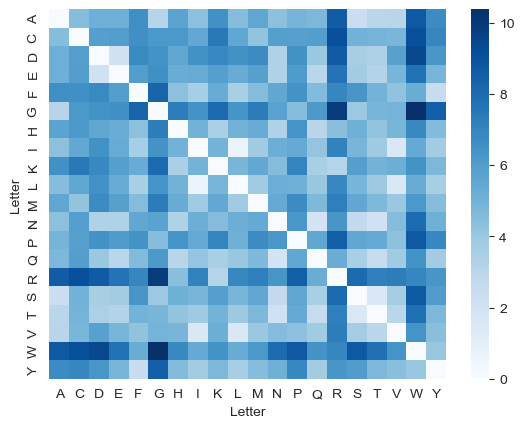

In [9]:
#sns.clustermap(aa_df, method="ward" ,cmap="vlag")
sns.heatmap(aa_df, cmap='Blues')